In [1]:
# poverty
import pandas as pd
rank_rep = pd.read_csv("./data/ranked_rep.csv")
rank_news = pd.read_csv("./data/ranked_news.csv")
df_news = pd.read_csv("./data/merged_news.csv")
df_news = df_news.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis = 1)

In [2]:
# the added value of using text analysis using topic modelling
import pandas as pd
df = pd.read_csv("./data/Fundamental.csv")
msci = pd.read_csv("./data/msci.csv")
msci2 = pd.read_csv("./data/msci2.csv")
df_description = pd.read_csv("./data/wiki_graph_data_2hop_description.csv")
wikidata = pd.read_csv("./data/wikidata.csv")




In [7]:
msci2.columns[0:20]

Index(['ISSUER_NAME', 'ISSUERID', 'ISSUER_TICKER', 'ISSUER_CUSIP',
       'ISSUER_SEDOL', 'ISSUER_ISIN', 'Figi', 'ISSUER_CNTRY_DOMICILE',
       'SDG_01_NET_ALIGNMENT', 'SDG_01_NET_ALIGNMENT_SCORE',
       'SDG_01_OPER_ALIGNMENT_SCORE', 'SDG_01_PROD_ALIGNMENT',
       'SDG_01_PROD_ALIGNMENT_SCORE', 'SDG_01_ALIGNMENT_SUMMARY',
       'SDG_01_OPER_ALIGNMENT', 'SDG_02_ALIGNMENT_SUMMARY',
       'SDG_02_NET_ALIGNMENT', 'SDG_02_NET_ALIGNMENT_SCORE',
       'SDG_02_OPER_ALIGNMENT', 'SDG_02_OPER_ALIGNMENT_SCORE'],
      dtype='object')

In [8]:
variable = 'GICS Industry'
variable2 = "SDG_01_NET_ALIGNMENT_SCORE"
variable3 = 'SDG_01_ALIGNMENT_SUMMARY'
variable4 = 'SDG_01_OPER_ALIGNMENT_SCORE'
variable5 = "SDG_01_PROD_ALIGNMENT_SCORE"

df2 = df[["Company Name", variable]].dropna()
SDG1 = msci[["Company Name", "Company ID", "Total SDG Rating RSAM"]].dropna()
SDG2 = msci2[["ISSUER_NAME", "Figi", variable2, variable3, variable4, variable5]].dropna()


In [11]:
pd.set_option('display.max_colwidth', 50)
SDG = SDG1.merge(SDG2, left_on="Company ID", right_on="Figi")
df_label = df2.merge(SDG, on="Company Name")
df_wiki_node_temp = df_label.merge(wikidata[["company", "wikidata_id"]], left_on="Company Name", right_on="company").rename(columns = {"wikidata_id":"wiki_id",variable2:"MSCI_net", variable4: "MSCI_oper"})
df_wiki_node = df_wiki_node_temp.merge(df_description[["wiki_id"]], on="wiki_id")
df_wiki_node

,Company Name,GICS Industry,Company ID,Total SDG Rating RSAM,ISSUER_NAME,Figi,SDG_01_NET_ALIGNMENT_SCORE,SDG_01_ALIGNMENT_SUMMARY,SDG_01_OPER_ALIGNMENT_SCORE,SDG_01_PROD_ALIGNMENT_SCORE,company,wiki_id
0,Pfizer Inc,Pharmaceuticals,BBG001FDZ744,3,PFIZER INC.,BBG001FDZ744,-0.5,PFIZER INC. was assessed as Neutral with SDG 0...,-6.0,5.0,Pfizer Inc,Q206921
1,State Bank of India,Banks,BBG001FG6MK8,3,State Bank of India,BBG001FG6MK8,-1.5,State Bank of India was assessed as Neutral wi...,-4.0,1.0,State Bank of India,Q1340361
2,Tesla Inc,Automobiles,BBG001FW1Z83,3,"TESLA, INC.",BBG001FW1Z83,-2.5,"TESLA, INC. was assessed as Misaligned with SD...",-5.0,0.0,Tesla Inc,Q478214
3,BASF SE,Chemicals,BBG001FFFZR4,3,BASF SE,BBG001FFFZR4,1.0,BASF SE was assessed as Neutral with SDG 01.\n...,2.0,0.0,BASF SE,Q9401
4,Koninklijke DSM NV,Chemicals,BBG001FFG081,3,Koninklijke DSM N.V.,BBG001FFG081,1.0,Koninklijke DSM N.V. was assessed as Neutral w...,2.0,0.0,Koninklijke DSM NV,Q902650
5,Muangthai Capital PCL,Consumer Finance,BBG0079S6SG8,3,Muangthai Capital Public Company Limited,BBG0079S6SG8,-2.5,Muangthai Capital Public Company Limited was a...,2.0,-7.0,Muangthai Capital PCL,Q6930725
6,Alstom SA,Machinery,BBG001FM0WD7,3,ALSTOM SA,BBG001FM0WD7,-2.0,ALSTOM SA was assessed as Misaligned with SDG ...,-4.0,0.0,Alstom SA,Q309084
7,CVS Health Corp,Health Care Providers & Services,BBG001GPH639,3,CVS HEALTH CORPORATION,BBG001GPH639,-1.5,CVS HEALTH CORPORATION was assessed as Neutral...,-4.0,1.0,CVS Health Corp,Q624375
8,ICICI Bank Ltd,Banks,BBG001FLC965,3,ICICI BANK LIMITED,BBG001FLC965,-1.0,ICICI BANK LIMITED was assessed as Neutral wit...,-3.0,1.0,ICICI Bank Ltd,Q1653258
9,Power Grid Corp of India Ltd,Electric Utilities,BBG001G5R4P3,3,POWER GRID CORPORATION OF INDIA LIMITED,BBG001G5R4P3,-1.0,POWER GRID CORPORATION OF INDIA LIMITED was as...,-2.0,0.0,Power Grid Corp of India Ltd,Q3400886


In [5]:
df_wiki_node[["MSCI_net"]] = df_wiki_node[["MSCI_net"]].apply(lambda x: 2 * (x-(-10))/ 20 - 1, axis=0)
df_wiki_node[["MSCI_oper"]] = df_wiki_node[["MSCI_oper"]].apply(lambda x: 2 * (x-(-10))/ 20 - 1, axis=0)

df_wiki_node[["Total SDG Rating RSAM"]] = df_wiki_node[["Total SDG Rating RSAM"]].apply(lambda x: 2 * (x-(-3))/ 6 - 1, axis=0)

In [6]:
# industry average
df_count = df_wiki_node["GICS Industry"].value_counts().reset_index().rename(columns = {"GICS Industry":"count", "index": "GICS Industry"})
df_mean = df_wiki_node[["GICS Industry", "MSCI_net", "Total SDG Rating RSAM"]].groupby("GICS Industry").agg("mean").reset_index()
df_industry_average = df_mean.merge(df_count, on = "GICS Industry").sort_values("count", ascending = False).round(5)
df_industry_average.rename(columns = {"MSCI_net": "MSCI_net_avg", "Total SDG Rating RSAM": "rsam_industry_avg"}).sort_values("MSCI_net_avg")

,GICS Industry,MSCI_net_avg,rsam_industry_avg,count
45,Metals & Mining,-0.22857,-0.07937,21
39,Interactive Media & Services,-0.16667,-0.05556,6
3,Automobiles,-0.12778,-0.01852,18
59,"Textiles, Apparel & Luxury Goods",-0.05000,0.33333,11
23,Energy Equipment & Services,-0.05000,-0.33333,4
61,Tobacco,-0.04500,-1.00000,10
58,"Technology Hardware, Storage & Peripherals",-0.03750,0.41667,8
32,"Hotels, Restaurants & Leisure",-0.03684,-0.22807,19
19,Diversified Telecommunication Services,-0.03684,0.45614,19
65,Wireless Telecommunication Services,-0.03636,0.60606,11


In [7]:
# industry average
df_count = df_wiki_node["GICS Industry"].value_counts().reset_index().rename(columns = {"GICS Industry":"count", "index": "GICS Industry"})
df_mean = df_wiki_node[["GICS Industry", "MSCI_oper", "Total SDG Rating RSAM"]].groupby("GICS Industry").agg("mean").reset_index()
df_industry_average = df_mean.merge(df_count, on = "GICS Industry").sort_values("count", ascending = False).round(5)
df_industry_average.rename(columns = {"MSCI_oper": "MSCI_oper_avg", "Total SDG Rating RSAM": "rsam_industry_avg"}).sort_values("MSCI_oper_avg")

,GICS Industry,MSCI_oper_avg,rsam_industry_avg,count
39,Interactive Media & Services,-0.33333,-0.05556,6
3,Automobiles,-0.25556,-0.01852,18
45,Metals & Mining,-0.21905,-0.07937,21
65,Wireless Telecommunication Services,-0.19091,0.60606,11
51,Pharmaceuticals,-0.16207,0.59770,29
61,Tobacco,-0.16000,-1.00000,10
30,Health Care Providers & Services,-0.12308,0.66667,13
37,Industrial Conglomerates,-0.11429,0.33333,7
19,Diversified Telecommunication Services,-0.11053,0.45614,19
23,Energy Equipment & Services,-0.10000,-0.33333,4


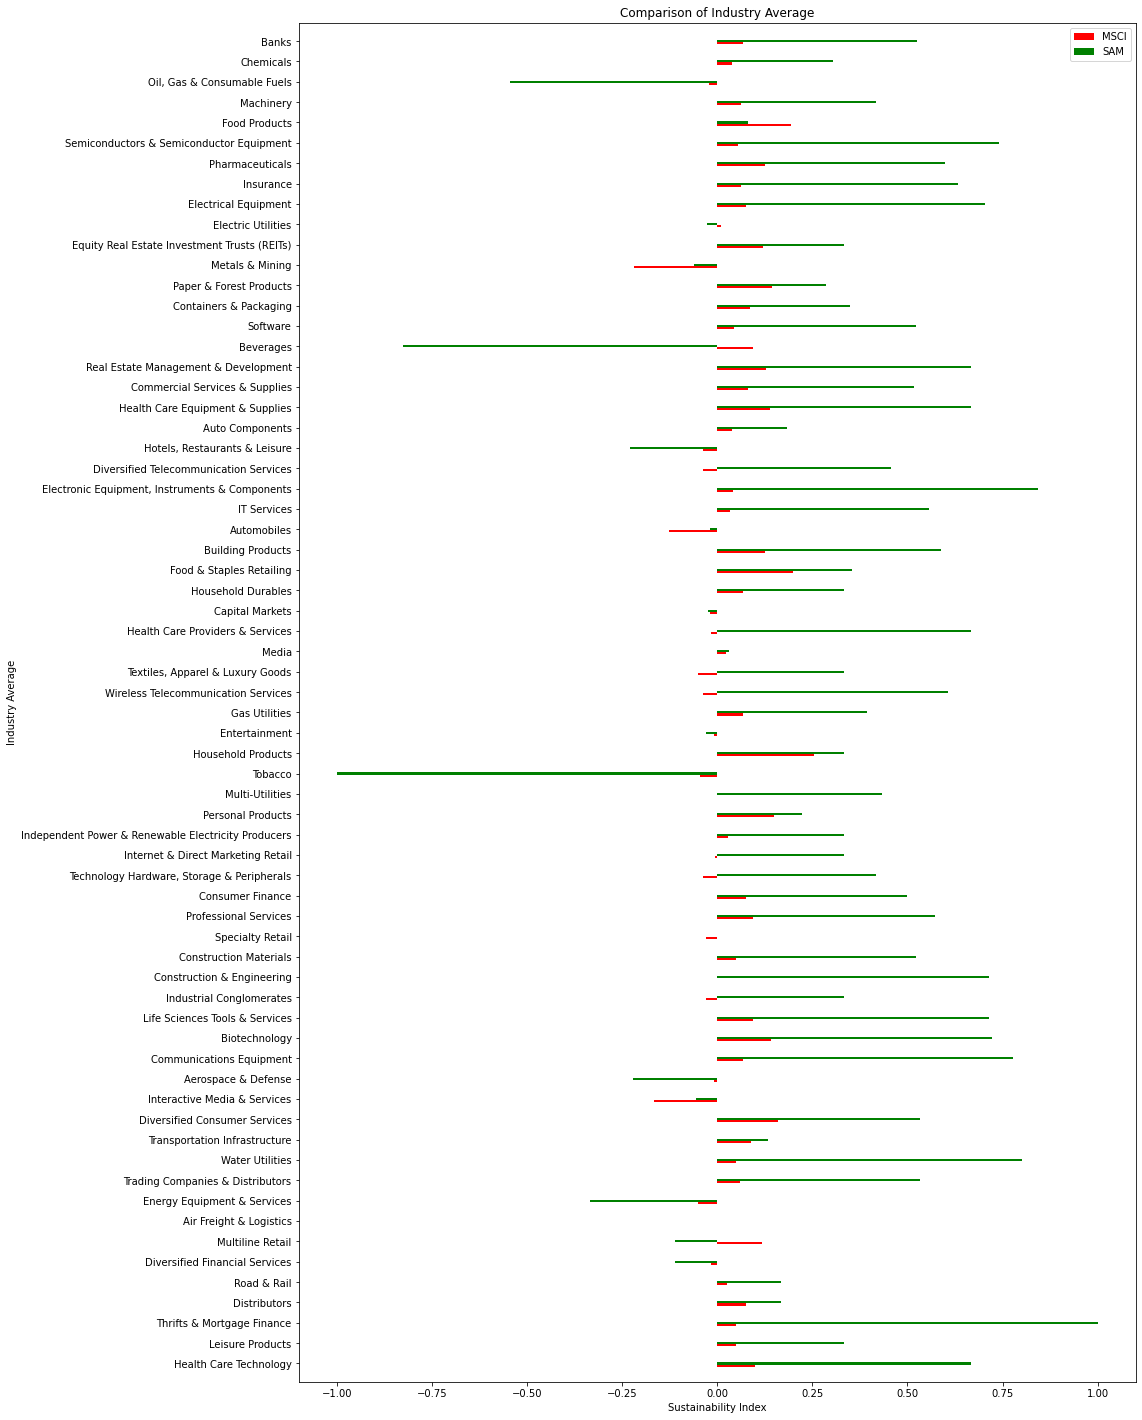

In [7]:


# # Numbers of pairs of bars you want
# N = 66

# # Data on X-axis
# import matplotlib.pyplot as plt
# import numpy as np
# msci = df_industry_average.label.values[::-1]
# sam = df_industry_average["Total SDG Rating RSAM"][::-1]

# # Position of bars on x-axis
# ind = np.arange(N)

# # Figure size
# # plt.figure(figsize=(20,20))

# # Width of a bar 
# width = 0.1 

# # Plotting
# fig, ax = plt.subplots()

# fig.set_figheight(25)
# fig.set_figwidth(15)

# ax.barh(ind, msci, width, label='MSCI', color = 'r')
# ax.barh(ind + width, sam, width, label='SAM', color = 'g')


# plt.xlabel('Sustainability Index')
# plt.ylabel('Industry Average')
# plt.title('Comparison of Industry Average')

# # # xticks()
# # # First argument - A list of positions at which ticks should be placed
# # # Second argument -  A list of labels to place at the given locations
# ax.set(yticks=ind + width, yticklabels = df_industry_average["GICS Industry"].values[::-1], ylim=[2*width - 1, N])

# # # Finding the best position for legends and putting it
# plt.legend(loc='best')
# plt.show()




In [121]:
pd.set_option('display.max_colwidth', 5000)
SDG2[SDG2.Figi == SDG1[SDG1["Company Name"]=="Samsung Electronics Co Ltd"]["Company ID"].values[0]]

,ISSUER_NAME,Figi,SDG_01_NET_ALIGNMENT_SCORE,SDG_01_ALIGNMENT_SUMMARY,SDG_01_OPER_ALIGNMENT_SCORE
1387,"SAMSUNG ELECTRONICS CO,.LTD",BBG001FFJ8H1,-3.0,"SAMSUNG ELECTRONICS CO,.LTD was assessed as Misaligned with SDG 01.\n\nThe company's products and services were Neutral with SDG 01. At the time of our review, the company did not generate substantial revenue from products or services that positively or negatively impacted SDG 01. \n\nThe company's operations were Misaligned with SDG 01. At the time of our assessment, the company had a policy addressing internationally recognized labor conventions that positively impacted SDG 01. The company was implicated in a moderate number of controversies, including: (1) South Korea: FTC penalty and corresponding complaint with prosecution for alleged unfair intra-group transactions through favorable meal service contracts with the affiliate, Samsung Welstory, (2) S. Korea: Seoul High Court sentenced vice chairman to 2.5 years in prison following a retrial of his 2017 conviction in a bribery case, (3) S. Korea: Samsung confirmed faulty battery design and manufacturing resulting in Galaxy Note 7 explosions, (4) S. Korea, Samsung Display: Labor union reached a final wage agreement to end its two week partial strikes, (5) United States: Final approval of class action lawsuits settlement over alleged selling faulty washing machines and warranty and (6) S. Korea: MSIT revoked approvals for 23 pieces of network equipment and communications devices due to allegation of false test records that negatively impacted SDG 01. The company's operations overall negatively impacted SDG 01 resulting in it being Misaligned with SDG 01.",-6.0


In [122]:
pd.set_option('display.max_colwidth', 5000)
SDG2[SDG2.Figi == SDG1[SDG1["Company Name"]=="Vodafone Group PLC"]["Company ID"].values[0]]

,ISSUER_NAME,Figi,SDG_01_NET_ALIGNMENT_SCORE,SDG_01_ALIGNMENT_SUMMARY,SDG_01_OPER_ALIGNMENT_SCORE
5659,VODAFONE GROUP PUBLIC LIMITED COMPANY,BBG001FDZNT2,-2.5,"VODAFONE GROUP PUBLIC LIMITED COMPANY was assessed as Misaligned with SDG 01.\n\nThe company's products and services were Neutral with SDG 01. At the time of our review, the company did not generate substantial revenue from products or services that positively or negatively impacted SDG 01. \n\nThe company's operations were Misaligned with SDG 01. At the time of our assessment, the company had a policy addressing internationally recognized labor conventions that positively impacted SDG 01. The company was implicated in a small number of controversies, including: (1) Egypt: National Telecom Regulatory Authority imposed EGP 7 million penalty over non-compliance with number portability regulation, (2) India: Tax issue over the acquisition of Hutchison-Essar and (3) UK: Employment Tribunal complaint over alleged racial discrimination, unfair dismissal and unauthorized wage deductions that negatively impacted SDG 01. The company's operations overall negatively impacted SDG 01 resulting in it being Misaligned with SDG 01.",-6.0


In [123]:
pd.set_option('display.max_colwidth', 5000)
SDG2[SDG2.Figi == SDG1[SDG1["Company Name"]=="Amazon.com Inc"]["Company ID"].values[0]]

,ISSUER_NAME,Figi,SDG_01_NET_ALIGNMENT_SCORE,SDG_01_ALIGNMENT_SUMMARY,SDG_01_OPER_ALIGNMENT_SCORE
2966,"AMAZON.COM, INC.",BBG001FK8HZ2,-0.5,"AMAZON.COM, INC. was assessed as Neutral with SDG 01.\n\nThe company's products and services were Aligned with SDG 01. At the time of our review, we estimated the company generated 7.04% of revenues from products like basic nutrition, sanitation products, treatment of major diseases, affordable homes, connectivity, educational products or services, or financing for small and medium enterprises that positively impacted SDG 01. The company's products and services overall positively impacted SDG 01 resulting in it being Aligned with SDG 01. \n\nThe company's operations were Misaligned with SDG 01. At the time of our assessment, the company had a policy addressing internationally recognized labor conventions, offered non-compensation benefits with material financial value and facilitated employment by supporting a large workforce (over 100,000 employees) that positively impacted SDG 01. The company was implicated in a moderate number of controversies, including: (1) Germany: Warehouse employees staged strikes with the Verdi trade union demanding better salary and working conditions since 2013, (2) France, Italy, Canada and the United States: Alleged poor working conditions and inadequate safety measures for employees during the COVID-19 pandemic, (3) Widespread allegations of poor working conditions at warehouse centers; announced minimum wage increase for workers in France and the United States, (4) India: Regulator probe over alleged antitrust violations related to discounting practices with preferred sellers, (5) United Kingdom: CMA investigation into alleged failure to perform due diligence to detect and remove fake reviews on its marketplace platform and (6) United States: Investigations into alleged anti-competitive business practices that negatively impacted SDG 01. The company's operations overall negatively impacted SDG 01 resulting in it being Misaligned with SDG 01.",-4.0


In [124]:
pd.set_option('display.max_colwidth', 5000)
SDG2[SDG2.Figi == SDG1[SDG1["Company Name"]=="AstraZeneca PLC"]["Company ID"].values[0]]



,ISSUER_NAME,Figi,SDG_01_NET_ALIGNMENT_SCORE,SDG_01_ALIGNMENT_SUMMARY,SDG_01_OPER_ALIGNMENT_SCORE
3037,ASTRAZENECA PLC,BBG001FFFG32,0.0,"ASTRAZENECA PLC was assessed as Neutral with SDG 01.\n\nThe company's products and services were Aligned with SDG 01. At the time of our review, we estimated the company generated 78.8% of revenues from products like basic nutrition, sanitation products, treatment of major diseases, affordable homes, connectivity, educational products or services, or financing for small and medium enterprises that positively impacted SDG 01. The company's products and services overall positively impacted SDG 01 resulting in it being Aligned with SDG 01. \n\nThe company's operations were Misaligned with SDG 01. At the time of our assessment, the company had a policy addressing internationally recognized labor conventions and offered non-compensation benefits with material financial value that positively impacted SDG 01. The company was implicated in a small number of controversies, including: (1) COVID-19 vaccine: Reports of side-effects and patient deaths following vaccination; suspension of vaccine roll-out in some countries, (2) United Kingdom: Lawsuit over employee termination due to alleged disability discrimination; employment tribunal reserved judgment, (3) Oregon, United States: Lawsuit over employee termination due to alleged retaliation and age discrimination and (4) Criticisms over alleged COVID-19 vaccine delivery delay that negatively impacted SDG 01. The company's operations overall negatively impacted SDG 01 resulting in it being Misaligned with SDG 01.",-5.0


In [125]:
pd.set_option('display.max_colwidth', 5000)
SDG2[SDG2.Figi == SDG1[SDG1["Company Name"]=="Unilever PLC"]["Company ID"].values[0]]



,ISSUER_NAME,Figi,SDG_01_NET_ALIGNMENT_SCORE,SDG_01_ALIGNMENT_SUMMARY,SDG_01_OPER_ALIGNMENT_SCORE
1308,UNILEVER PLC,BBG001FDZLK5,1.5,"UNILEVER PLC was assessed as Neutral with SDG 01.\n\nThe company's products and services were Aligned with SDG 01. At the time of our review, we estimated the company generated 47.21% of revenues from products like basic nutrition, sanitation products, treatment of major diseases, affordable homes, connectivity, educational products or services, or financing for small and medium enterprises that positively impacted SDG 01. The company's products and services overall positively impacted SDG 01 resulting in it being Aligned with SDG 01. \n\nThe company's operations were Misaligned with SDG 01. At the time of our assessment, the company had a policy addressing internationally recognized labor conventions, offered non-compensation benefits with material financial value and facilitated employment by supporting a large workforce (over 100,000 employees) that positively impacted SDG 01. The company was implicated in a small number of controversies, including: (1) South Africa: Proposed Penalty of Ten Percent of Local Annual Turnover over Allegations of Collusion on Prices of Edible Oils and Margarine, (2) Kenya: Union sought to ban the use of tea harvesting machines; Court ruled in favor of adopting technology, (3) Malaysia: Allegations of forced labor in plantations of palm oil supplier and (4) United Kingdom: Allegations of underpaying hundreds of millions in tax that negatively impacted SDG 01. The company's operations overall negatively impacted SDG 01 resulting in it being Misaligned with SDG 01.",-2.0


In [126]:
pd.set_option('display.max_colwidth', 50)
rank_rep.merge(df_wiki_node, on="company", how="left").dropna().drop(['Unnamed: 0', 'Unnamed: 0.1', 'id'], axis = 1).head(20)
# .merge(df_news.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'content'], axis = 1), on="company")

,company,statement,polarity,subjectivity,rank,relevance_score,Company Name,GICS Industry,Company ID,Total SDG Rating RSAM,ISSUER_NAME,Figi,MSCI_net,SDG_01_ALIGNMENT_SUMMARY,MSCI_oper,wiki_id
0,Samsung Electronics Co Ltd,01 NO POVERTY End poverty in all its forms eve...,0.314103,0.412821,0,12.228600,Samsung Electronics Co Ltd,"Technology Hardware, Storage & Peripherals",BBG001FFJ8H1,0.333333,"SAMSUNG ELECTRONICS CO,.LTD",BBG001FFJ8H1,-0.30,"SAMSUNG ELECTRONICS CO,.LTD was assessed as Mi...",-0.6,Q20718
1,Samsung Electronics Co Ltd,1 NO POVERTYEnd poverty in all its forms every...,0.293590,0.464103,1,12.518752,Samsung Electronics Co Ltd,"Technology Hardware, Storage & Peripherals",BBG001FFJ8H1,0.333333,"SAMSUNG ELECTRONICS CO,.LTD",BBG001FFJ8H1,-0.30,"SAMSUNG ELECTRONICS CO,.LTD was assessed as Mi...",-0.6,Q20718
2,Tokio Marine Holdings Inc,No poverty(End poverty in all its forms everyw...,0.050000,0.275000,2,12.629732,Tokio Marine Holdings Inc,Insurance,BBG001GQ7KV6,0.666667,"Tokio Marine Holdings, Inc.",BBG001GQ7KV6,0.10,"Tokio Marine Holdings, Inc. was assessed as Ne...",0.2,Q1812086
4,Vodafone Group PLC,"In South Africa specifically, the government i...",0.000000,0.000000,4,13.435251,Vodafone Group PLC,Wireless Telecommunication Services,BBG001FDZNT2,1.000000,VODAFONE GROUP PUBLIC LIMITED COMPANY,BBG001FDZNT2,-0.25,VODAFONE GROUP PUBLIC LIMITED COMPANY was asse...,-0.6,Q122141
5,Owens Corning,The 17 UN SDGs are listed POVERTY 3End poverty...,0.227451,0.391176,5,13.697548,Owens Corning,Building Products,BBG001FN8QD0,0.666667,OWENS CORNING,BBG001FN8QD0,0.10,OWENS CORNING was assessed as Neutral with SDG...,0.2,Q7114736
6,China Traditional Chinese Medicine Holdings Co...,8.3The two sides will continue to enhance expe...,-0.031250,0.218750,6,13.937057,China Traditional Chinese Medicine Holdings Co...,Pharmaceuticals,BBG001FT8RT8,1.000000,China Traditional Chinese Medicine Holdings Co...,BBG001FT8RT8,0.10,China Traditional Chinese Medicine Holdings Co...,0.1,Q27892807
7,Samsung Electronics Co Ltd,End poverty in all its forms everywhereEnd hun...,0.259524,0.373810,7,14.013556,Samsung Electronics Co Ltd,"Technology Hardware, Storage & Peripherals",BBG001FFJ8H1,0.333333,"SAMSUNG ELECTRONICS CO,.LTD",BBG001FFJ8H1,-0.30,"SAMSUNG ELECTRONICS CO,.LTD was assessed as Mi...",-0.6,Q20718
8,Bank Negara Indonesia Persero Tbk PT,"NO POVERTYEnd poverty in all its , salary, and...",0.180000,0.370000,8,14.039304,Bank Negara Indonesia Persero Tbk PT,Banks,BBG001FHH3Z0,1.000000,PT Bank Negara Indonesia (Persero) Tbk,BBG001FHH3Z0,0.30,PT Bank Negara Indonesia (Persero) Tbk was ass...,0.1,Q2882611
9,Nine Dragons Paper Holdings Ltd,In addition to assistance to the poor and vuln...,-0.175000,0.325000,9,14.129750,Nine Dragons Paper Holdings Ltd,Paper & Forest Products,BBG001FKCWY5,0.666667,NINE DRAGONS PAPER (HOLDINGS) LIMITED,BBG001FKCWY5,0.10,NINE DRAGONS PAPER (HOLDINGS) LIMITED was asse...,0.2,Q4972947
10,Samsung Electronics Co Ltd,UN SDGs (Sustainable Development Goals) End po...,0.214583,0.402083,10,14.209755,Samsung Electronics Co Ltd,"Technology Hardware, Storage & Peripherals",BBG001FFJ8H1,0.333333,"SAMSUNG ELECTRONICS CO,.LTD",BBG001FFJ8H1,-0.30,"SAMSUNG ELECTRONICS CO,.LTD was assessed as Mi...",-0.6,Q20718


In [127]:
pd.set_option('display.max_colwidth', 50)
rank_news2 = rank_news.merge(df_wiki_node, on="company", how="left").dropna().drop(['Unnamed: 0', 'Unnamed: 0.1', 'id'], axis = 1).head(20)
rank_news2


,company,date,news_url,lang,statement,rank,relevance_score,Company Name,GICS Industry,Company ID,Total SDG Rating RSAM,ISSUER_NAME,Figi,MSCI_net,SDG_01_ALIGNMENT_SUMMARY,MSCI_oper,wiki_id
0,Saudi Telecom Co,2021-04-29T12:18:29Z,https://au.int/en/stc-finance-2021,en,"However, major challenges remain the Africas D...",0,15.228045,Saudi Telecom Co,Diversified Telecommunication Services,BBG001GG66C1,0.333333,Saudi Telecom Company SJSC,BBG001GG66C1,0.00,Saudi Telecom Company SJSC was assessed as Neu...,0.0,Q1535171
1,Chevron Corp,2021-02-04T06:17:04Z,https://www.reuters.com/article/us-global-oil-...,en,According to the Oxford Poverty and Human Deve...,1,15.492082,Chevron Corp,"Oil, Gas & Consumable Fuels",BBG001FDYC08,-0.666667,CHEVRON CORPORATION,BBG001FDYC08,-0.25,CHEVRON CORPORATION was assessed as Misaligned...,-0.5,Q319642
2,MTN Group,2021-10-25T06:17:13Z,https://www.zawya.com/mena/en/press-releases/s...,en,"The African Development Bank, through the Afri...",2,15.598703,MTN Group,Wireless Telecommunication Services,BBG001FGYXX9,0.666667,MTN GROUP LIMITED,BBG001FGYXX9,0.05,MTN GROUP LIMITED was assessed as Neutral with...,-0.2,Q1813361
3,International Business Machines Corp,2021-02-03T16:03:49Z,https://blogs.worldbank.org/opendata/data-driv...,en,"Senior Economist, Poverty and Equity Global Pr...",3,16.444853,International Business Machines Corp,IT Services,BBG001G4LRK6,0.666667,INTERNATIONAL BUSINESS MACHINES CORPORATION,BBG001G4LRK6,-0.20,INTERNATIONAL BUSINESS MACHINES CORPORATION wa...,-0.4,Q37156
4,PayPal Holdings Inc,2021-03-15T09:33:56Z,https://techcabal.com/2021/03/15/the-next-wave...,en,Africa is an untapped frontier on digital lend...,4,16.709604,PayPal Holdings Inc,IT Services,BBG0077VNXK8,1.000000,"PAYPAL HOLDINGS, INC.",BBG0077VNXK8,0.00,"PAYPAL HOLDINGS, INC. was assessed as Neutral ...",-0.1,Q483959
5,BHP Group Ltd,2021-01-26T16:18:48Z,https://www.abc.net.au/news/2021-01-19/cerrejo...,en,The NGO said there was a lack of sufficient fo...,5,16.804758,BHP Group Ltd,Metals & Mining,BBG001FDY8F1,-0.333333,BHP GROUP LIMITED,BBG001FDY8F1,-1.00,BHP GROUP LIMITED was assessed as Strongly Mis...,-1.0,Q625713
6,Exxon Mobil Corp,2021-04-18T08:16:59Z,https://www.dailymaverick.co.za/article/2021-0...,en,"Poverty and inequality were increasing, but th...",6,16.817978,Exxon Mobil Corp,"Oil, Gas & Consumable Fuels",BBG001FDYLD4,-0.333333,EXXON MOBIL CORPORATION,BBG001FDYLD4,-0.25,EXXON MOBIL CORPORATION was assessed as Misali...,-0.5,Q156238
7,Pfizer Inc,2021-01-28T06:17:54Z,https://www.reuters.com/article/uk-health-coro...,en,"Countries in sub-Saharan Africa, some among th...",7,16.907909,Pfizer Inc,Pharmaceuticals,BBG001FDZ744,1.000000,PFIZER INC.,BBG001FDZ744,-0.05,PFIZER INC. was assessed as Neutral with SDG 0...,-0.6,Q206921
8,Pfizer Inc,2021-01-21T08:48:43Z,https://www.polity.org.za/article/ivory-coast-...,en,"Countries in sub-Saharan Africa, some among th...",8,16.911510,Pfizer Inc,Pharmaceuticals,BBG001FDZ744,1.000000,PFIZER INC.,BBG001FDZ744,-0.05,PFIZER INC. was assessed as Neutral with SDG 0...,-0.6,Q206921
9,AstraZeneca PLC,2021-01-21T07:03:13Z,http://www.channelafrica.co.za/sabc/home/chann...,en,"Countries in sub-Saharan Africa, some among th...",9,16.916536,AstraZeneca PLC,Pharmaceuticals,BBG001FFFG32,1.000000,ASTRAZENECA PLC,BBG001FFFG32,0.00,ASTRAZENECA PLC was assessed as Neutral with S...,-0.5,Q731938


In [16]:
rank_news3 = rank_news2.merge(df_news[df_news.company.isin(rank_news2.company.unique())].drop(["date","news_url","lang"], axis = 1), on="company", how="left").drop_duplicates(subset="statement")[["company", "date", "news_url", "lang", "statement", "rank", "GICS Industry", 'label', 'Total SDG Rating RSAM', 'polarity', 'magnitude', 'score', 'numMentions', 'avgSalience']]
rank_news3

,company,date,news_url,lang,statement,rank,GICS Industry,label,Total SDG Rating RSAM,polarity,magnitude,score,numMentions,avgSalience
0,Saudi Telecom Co,2021-04-29T12:18:29Z,https://au.int/en/stc-finance-2021,en,"However, major challenges remain the Africas D...",0,Diversified Telecommunication Services,0.00,0.333333,0,4.7,0.4,2.0,0.025996
69,Chevron Corp,2021-02-04T06:17:04Z,https://www.reuters.com/article/us-global-oil-...,en,According to the Oxford Poverty and Human Deve...,1,"Oil, Gas & Consumable Fuels",-0.25,-0.666667,0,3.7,0.0,8.0,0.477496
1433,MTN Group,2021-10-25T06:17:13Z,https://www.zawya.com/mena/en/press-releases/s...,en,"The African Development Bank, through the Afri...",2,Wireless Telecommunication Services,0.05,0.666667,0,10.4,0.3,12.0,0.496415
2225,International Business Machines Corp,2021-02-03T16:03:49Z,https://blogs.worldbank.org/opendata/data-driv...,en,"Senior Economist, Poverty and Equity Global Pr...",3,IT Services,-0.20,0.666667,0,4.3,0.0,3.0,0.094143
4501,PayPal Holdings Inc,2021-03-15T09:33:56Z,https://techcabal.com/2021/03/15/the-next-wave...,en,Africa is an untapped frontier on digital lend...,4,IT Services,0.00,1.000000,0,3.5,0.1,6.0,0.013572
7887,BHP Group Ltd,2021-01-26T16:18:48Z,https://www.abc.net.au/news/2021-01-19/cerrejo...,en,The NGO said there was a lack of sufficient fo...,5,Metals & Mining,-1.00,-0.333333,0,3.6,-0.1,2.0,0.025315
8424,Exxon Mobil Corp,2021-04-18T08:16:59Z,https://www.dailymaverick.co.za/article/2021-0...,en,"Poverty and inequality were increasing, but th...",6,"Oil, Gas & Consumable Fuels",-0.25,-0.333333,0,5.6,0.0,4.0,0.020762
11463,Pfizer Inc,2021-01-28T06:17:54Z,https://www.reuters.com/article/uk-health-coro...,en,"Countries in sub-Saharan Africa, some among th...",7,Pharmaceuticals,-0.05,1.000000,0,1.2,-0.1,4.0,0.050265
80118,Pfizer Inc,2021-01-21T08:48:43Z,https://www.polity.org.za/article/ivory-coast-...,en,"Countries in sub-Saharan Africa, some among th...",8,Pharmaceuticals,-0.05,1.000000,0,1.2,-0.1,4.0,0.050265
148773,AstraZeneca PLC,2021-01-21T07:03:13Z,http://www.channelafrica.co.za/sabc/home/chann...,en,"Countries in sub-Saharan Africa, some among th...",9,Pharmaceuticals,0.00,1.000000,0,9.0,0.0,1.0,0.018333


In [26]:
pd.set_option('display.max_colwidth', 200)
df_temp = df_news[df_news.company == "Samsung Electronics Co Ltd"]
df_temp["score_mul_magnitude_mul_numMentions"] = df_temp["score"] * df_temp["magnitude"] * df_temp["numMentions"]
df_temp.sort_values("score_mul_magnitude_mul_numMentions")

# .sort_values("score")
# .news_url.values

c:\users\qhuca\anaconda3\envs\download\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,company,date,news_url,lang,polarity,magnitude,score,numMentions,avgSalience,wiki_name,mid,wikipediaUrl,content,score_mul_magnitude_mul_numMentions
78882,Samsung Electronics Co Ltd,2021-01-18T10:03:56Z,https://www.winnipegfreepress.com/business/skorean-court-gives-samsung-scion-prison-term-over-bribery--573612192.html,en,0,14.2,-0.3,14.0,0.037595,Samsung Electronics,/m/01nn79,https://en.wikipedia.org/wiki/Samsung_Electronics,Winnipeg Full Forecast Finding yourinformation ©2021 FP Newspaper Inc. Quick Links Ways to support us Replica E-Edition Business Arts & Life Sports Opinion Media Homes Canstar Community News Coupo...,-59.64
78345,Samsung Electronics Co Ltd,2021-01-18T08:47:45Z,https://www.myjournalcourier.com/news/article/SKorean-court-gives-Samsung-scion-prison-term-15878744.php,en,0,13.7,-0.3,14.0,0.032640,Samsung Electronics,/m/01nn79,https://en.wikipedia.org/wiki/Samsung_Electronics,NaN,-57.54
78052,Samsung Electronics Co Ltd,2021-01-18T08:02:37Z,https://www.thetelegraph.com/news/article/SKorean-court-gives-Samsung-scion-prison-term-15878744.php,en,0,13.7,-0.3,14.0,0.032640,Samsung Electronics,/m/01nn79,https://en.wikipedia.org/wiki/Samsung_Electronics,NaN,-57.54
413035,Samsung Electronics Co Ltd,2021-05-11T11:34:32Z,https://www.storm.mg/article/3669833,zh-Hant,0,9.7,-0.2,28.0,0.030358,三星,/m/01nn79,https://en.wikipedia.org/wiki/Samsung_Electronics,\n?\näººæ°£\n ç¾æ­£ç±æ ä¸­ ç±éæ°è ç±éåäº« \n\t\t\t\t\t\t\tåéä¸æéåå®£å¸å°å¨ç¾åæè³å»ºè¨­å®¶é»å·¥å» ï¼APï¼\n\t\t\t\t\t\t å¨å ¨çæ¶çç­ç¼ºçæ æ³ä¸ï¼å°ç©...,-54.32
90392,Samsung Electronics Co Ltd,2021-01-19T16:16:49Z,https://www.nationnews.com/2021/01/19/samsung-heir-jailed-bribery/,en,0,9.8,-0.4,13.0,0.109906,Samsung,/m/01nn79,https://en.wikipedia.org/wiki/Samsung_Electronics,Today \nDecember 08\t\t9:44 pm \nSamsung heir Lee Jae Yong. (BBC) Samsung heir Lee Jae Yong has been sentenced to two years and six months in prison by a high court in South Korea. The bribery c...,-50.96
77834,Samsung Electronics Co Ltd,2021-01-18T07:18:37Z,https://www.ourmidland.com/news/article/SKorean-court-gives-Samsung-scion-prison-term-15878744.php,en,0,11.9,-0.3,13.0,0.026758,Samsung Electronics,/m/01nn79,https://en.wikipedia.org/wiki/Samsung_Electronics,NaN,-46.41
80792,Samsung Electronics Co Ltd,2021-01-18T14:47:26Z,https://www.businessinsider.in/tech/news/samsung-heir-jay-y-lee-ordered-back-to-prison-for-2-and-a-half-years-over-bribery-charges/articleshow/80329928.cms,en,0,9.2,-0.5,10.0,0.036999,Samsung,/m/01nn79,https://en.wikipedia.org/wiki/Samsung_Electronics,"Samsung's vice chairman and de facto leader, Jay Y. Lee, on Monday was sent back to prison with a 2-1/2-year sentence over bribery charges. Lee has been the de facto head of Samsung Electronics si...",-46.00
77970,Samsung Electronics Co Ltd,2021-01-18T07:46:52Z,http://www.koreatimes.co.kr/www/tech/2021/01/133_302656.html,en,0,14.0,-0.2,16.0,0.182283,Samsung Electronics,/m/01nn79,https://en.wikipedia.org/wiki/Samsung_Electronics,La Palma volcano erupts 'Squid Game' spreads over the world Daily life in Haiti after a series of environmental disasters and political unrest Daily life in Kabul under Taliban rule Climate cr...,-44.80
78054,Samsung Electronics Co Ltd,2021-01-18T08:02:16Z,https://mynorthwest.com/2472671/skorean-court-gives-samsung-scion-prison-term-over-bribery/,en,0,12.3,-0.3,12.0,0.031556,Samsung Electronics,/m/01nn79,https://en.wikipedia.org/wiki/Samsung_Electronics,NaN,-44.28
98553,Samsung Electronics Co Ltd,2021-01-20T10:34:37Z,https://www.cnn.com/2021/01/20/tech/samsung-leadership-intl-hnk/,en,0,12.5,-0.3,9.0,0.043432,Samsung,/m/01nn79,https://en.wikipedia.org/wiki/Samsung_Electronics,"By Jake Kwon, CNN Business Updated 1811 GMT (0211 HKT) January 20, 2021 Seoul (CNN Business)The man who calls the shots at Samsung was just sent to prison for the second time in less than five y...",-33.75


In [151]:
pd.set_option('display.max_colwidth', 200)
df_temp = df_news[df_news.company == "Vodafone Group PLC"]
df_temp["score_mul_magnitude_mul_numMentions"] = df_temp["score"] * df_temp["magnitude"] * df_temp["numMentions"]
df_temp.sort_values("score_mul_magnitude_mul_numMentions")
# df_temp.sort_values("score")

c:\users\qhuca\anaconda3\envs\download\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,company,date,news_url,lang,polarity,magnitude,score,numMentions,avgSalience,wiki_name,mid,wikipediaUrl,content,score_mul_magnitude_mul_numMentions
255150,Vodafone Group PLC,2021-04-20T03:47:43Z,https://www.newshub.co.nz/home/new-zealand/2021/04/vodafone-s-memo-warning-staff-could-be-fired-if-stranded-in-australia-grossly-unfair-disgusting.html,en,0,19.0,-0.5,12.0,0.253568,Vodafone,/m/02d6ph,https://en.wikipedia.org/wiki/Vodafone,This content is not available in your region,-114.00
71938,Vodafone Group PLC,2021-01-17T05:32:49Z,https://www.independent.ie/business/technology/hey-teacher-zoom-those-kids-39972148.html,en,0,27.0,-0.3,13.0,0.150220,Vodafone,/m/02d6ph,https://en.wikipedia.org/wiki/Vodafone,"\nIndependentie \nSearch\n\nSearch\n Wednesday, 8 December 2021 | 3.8°C Dublin \nSearch\n\nSearch\n \n\nMenu Sections\n\n \nSearch\n\nSearch\n \n\nMenu Sections\n\n Adrian Weckler \nClose\n Child...",-105.30
390308,Vodafone Group PLC,2021-05-06T11:02:32Z,https://www.dailymail.co.uk/money/experts/article-9545385/GRACE-CASE-bad-Vodafone-credit-marks-removed.html,en,0,32.7,-0.2,16.0,0.166960,Vodafone,/m/02d6ph,https://en.wikipedia.org/wiki/Vodafone,"By Grace on the Case Published: 07:29 GMT, 6 May 2021 | Updated: 11:22 GMT, 6 May 2021 33 View comments In 1986, I set up a construction business with a fellow builder and we both ha...",-104.64
454487,Vodafone Group PLC,2021-06-04T15:17:12Z,http://libcom.org/library/march-26th-aftermath-%E2%80%93-where-next-anti-cuts-movement,en,0,43.9,-0.3,6.0,0.024088,Vodafone,/m/02d6ph,https://en.wikipedia.org/wiki/Vodafone,"Jon Gaynor on the events of March 26th, and the questions posed to the anti-cuts movement by the day's events. Originally published in May 2011. Well, we should have seen it coming. The police, ...",-79.02
521553,Vodafone Group PLC,2021-01-29T00:32:37Z,http://www.thenorthlines.com/india-must-avoid-the-retrospective-tax-mess/,en,0,21.3,-0.3,10.0,0.023897,Vodafone,/m/02d6ph,https://en.wikipedia.org/wiki/Vodafone,"Govind Bhattacharjee Other countries have also tried taxing MNCs retrospectively, but this ends up destroying these firms to the extent that the domestic economy and employment suffer In the McCul...",-63.90
587008,Vodafone Group PLC,2021-02-04T21:31:44Z,https://www.stuff.co.nz/business/124157707/vodafone-to-blacklist-media-outlets-that-promote-hateful-content-or-fake-news,en,0,10.1,-0.5,12.0,0.214679,Vodafone NZ,/m/02d6ph,https://en.wikipedia.org/wiki/Vodafone,"Vodafone NZ will black-list media outlets if it has ethical concerns about their content, under a new advertising policy drawn up in the wake of MediaWorksâ Magic Talk racism debacle. The compa...",-60.60
427780,Vodafone Group PLC,2021-05-23T00:16:45Z,https://www.msn.com/en-xl/news/other/did-insecure-wi-fi-lead-the-police-to-our-door/ar-AAKhibG,en,0,29.2,-0.5,4.0,0.010503,Vodafone,/m/02d6ph,https://en.wikipedia.org/wiki/Vodafone,NaN,-58.40
713685,Vodafone Group PLC,2021-10-26T19:18:38Z,https://www.lightreading.com/services/the-big-tech-elephant-is-squashing-telecom/d/d-id/773045,en,0,22.2,-0.2,13.0,0.183071,Vodafone,/m/02d6ph,https://en.wikipedia.org/wiki/Vodafone,"Total Telecom Congress 2021  LONDON, UK  Johan Wibergh, Vodafone's Swedish chief technology officer, is a hard man to miss at a physical event. Towering well above six feet, the hairless dome of...",-57.72
428140,Vodafone Group PLC,2021-05-23T02:17:16Z,https://www.bbc.com/news/technology-57156799,en,0,29.6,-0.4,4.0,0.014796,Vodafone,/m/02d6ph,https://en.wikipedia.org/wiki/Vodafone,"By Jane WakefieldTechnology reporter After a year of lockdowns, home schooling and a bout of Covid, Kate and Matthew (not their real names) were hoping for better times as 2021 dawned. Instead, o...",-47.36
470109,Vodafone Group PLC,2021-06-07T11:46:38Z,https://www.fool.co.uk/investing/2021/06/07/heres-why-i-think-the-vodafone-share-price-is-undervalued/,en,0,22.5,-0.2,10.0,0.196425,Vodafone,/m/02d6ph,https://en.wikipedia.org/wiki/Vodafone,NaN,-45.00


In [159]:
# https://www.tra.gov.eg/en/ntra-imposes-a-fine-of-20650-000-pounds-on-mobile-operators-for-violating-mobile-number-portability-service-regulations/
pd.set_option('display.max_colwidth', 200)
df_temp.dropna()[(df_temp.dropna().content.str.contains("Hutchison-Essar"))]
df_temp.dropna()[(df_temp.dropna().content.str.contains("discrimination"))]

,company,date,news_url,lang,polarity,magnitude,score,numMentions,avgSalience,wiki_name,mid,wikipediaUrl,content,score_mul_magnitude_mul_numMentions
521553,Vodafone Group PLC,2021-01-29T00:32:37Z,http://www.thenorthlines.com/india-must-avoid-the-retrospective-tax-mess/,en,0,21.3,-0.3,10.0,0.023897,Vodafone,/m/02d6ph,https://en.wikipedia.org/wiki/Vodafone,"Govind Bhattacharjee Other countries have also tried taxing MNCs retrospectively, but this ends up destroying these firms to the extent that the domestic economy and employment suffer In the McCul...",-63.9


In [31]:
pd.set_option('display.max_colwidth', 200)
df_temp = df_news[df_news.company == "Amazon.com Inc"].sort_values("overall_score")
df_temp

# df_temp.dropna()[(df_temp.dropna().content.str.lower().str.contains("warehouse"))]
# df_temp.dropna()[(df_temp.dropna().content.str.lower().str.contains("covid-19"))]
# df_temp.dropna()[(df_temp.dropna().content.str.lower().str.contains("india"))]
# df_temp.dropna()[(df_temp.dropna().content.str.lower().str.contains("anti-competitive"))]

,company,date,news_url,lang,polarity,magnitude,score,numMentions,avgSalience,wiki_name,mid,wikipediaUrl,content,overall_score
646804,Amazon.com Inc,2021-03-16T05:48:06Z,https://www.nytimes.com/2021/02/18/magazine/amazon-workers-employees-covid-19.html,en,0,136.6,-0.2,118.0,0.761556,Eastvale Amazon,/m/0mgkg,https://en.wikipedia.org/wiki/Amazon_(company),The Future Of Work Covid-19 has cemented the e-commerce giantâs hold on the economy â but it has also spurred employees all around the country to organize. Credit...Photo Illustration by James...,-3223.76
648455,Amazon.com Inc,2021-03-16T09:33:57Z,https://www.nytimes.com/2021/03/16/technology/how-amazon-crushes-unions.html,en,0,90.7,-0.3,79.0,0.213681,Amazon,/m/0mgkg,https://en.wikipedia.org/wiki/Amazon_(company),"In a secret settlement in Virginia, Amazon swore off threatening and intimidating workers. As the company confronts increased labor unrest, its tactics are under scrutiny. Amazonâs warehouse in...",-2149.59
660664,Amazon.com Inc,2021-03-24T10:02:20Z,https://www.msn.com/en-us/news/other/amazon-workers-leading-a-historic-push-for-unionization-in-alabama-describe-midnight-education-meetings-an-unexpected-mailbox-and-streams-of-anti-union-flyers-...,en,0,67.7,-0.3,79.0,0.549854,Insider Amazon,/m/0mgkg,https://en.wikipedia.org/wiki/Amazon_(company),"Six thousand warehouse workers in Alabama could soon decide the future of a $1.5 trillion tech giant and its 560,000 employees worldwide. One of those employees, Darryl Richardson, 51, said he was...",-1604.49
649130,Amazon.com Inc,2021-03-16T10:47:22Z,https://www.nytimes.com/2021/03/16/technology/amazon-unions-virginia.html,en,0,72.5,-0.3,66.0,0.206893,Amazon,/m/0mgkg,https://en.wikipedia.org/wiki/Amazon_(company),"In a secret settlement in Virginia, Amazon swore off threatening and intimidating workers. As the company confronts increased labor unrest, its tactics are under scrutiny. Amazonâs warehouse in...",-1435.50
98378,Amazon.com Inc,2021-01-20T10:17:17Z,https://www.fluther.com/224908/is-the-first-amendment-history-now/,en,0,241.7,-0.3,17.0,0.016038,Amazon,/m/0mgkg,https://en.wikipedia.org/wiki/Amazon_(company),"Just consider what has happened in the last few days: 1. Twitter bans Trump for ever.\n2. Parler gets shut down by concerted actions of Amazon, Apple and Google.\n3. Simon and Schuster drops their...",-1232.67
126346,Amazon.com Inc,2021-11-19T15:48:35Z,https://prospect.org/power/amazons-attack-on-womens-health/,en,0,73.5,-0.3,54.0,0.081874,Amazon,/m/0mgkg,https://en.wikipedia.org/wiki/Amazon_(company),"A company that treats a common pelvic ailment will soon have all its FDA-compliant medical devices listed on Amazonâin the âadultâ category. by \n David Dayen November 19, 2021 10:36 AM ...",-1190.70
660226,Amazon.com Inc,2021-03-24T09:03:40Z,https://www.businessinsider.com/amazon-union-alabama-workers-describe-anti-union-tactics-bessemer-2021-3,en,0,66.5,-0.3,55.0,0.757757,Amazon,/m/0mgkg,https://en.wikipedia.org/wiki/Amazon_(company),A leading-edge research firm focused on digital transformation. \n Good\n \n \nSubscriber\nAccount active\n since\n \n Six thousand warehouse workers in...,-1097.25
357572,Amazon.com Inc,2021-05-02T17:47:55Z,https://longreads.trust.org/item/Inside-Amazon-shadow-workforce-Mexico,en,0,52.0,-0.3,57.0,0.688041,Amazon,/m/0mgkg,https://en.wikipedia.org/wiki/Amazon_(company),"BY Christine Murray and Avi Asher-Schapiro 28 April 2021 What did you think of this story? From climate change to land rights - the best stories, the biggest ideas, the arguments that matter. Sig...",-889.20
328497,Amazon.com Inc,2021-04-28T18:33:51Z,https://longreads.trust.org/item/Inside-Amazon-shadow-workforce-Mexico,en,0,52.0,-0.3,57.0,0.688041,Amazon,/m/0mgkg,https://en.wikipedia.org/wiki/Amazon_(company),"BY Christine Murray and Avi Asher-Schapiro 28 April 2021 What did you think of this story? From climate change to land rights - the best stories, the biggest ideas, the arguments that matter. Sig..."

In [57]:
pd.set_option('display.max_colwidth', 200)
df_temp = df_news[df_news.company == "AstraZeneca PLC"].sort_values("overall_score")
df_temp.dropna()[(df_temp.dropna().content.str.lower().str.contains("suspension"))]
# df_temp.dropna()[(df_temp.dropna().content.str.lower().str.contains("delay"))]

,company,date,news_url,lang,polarity,magnitude,score,numMentions,avgSalience,wiki_name,mid,wikipediaUrl,content,overall_score
647699,AstraZeneca PLC,2021-03-16T08:17:27Z,https://www.dailymail.co.uk/news/article-9366749/MPs-plead-Britons-taking-safe-AstraZeneca-jabs.html,en,0,104.7,-0.3,54.0,0.440599,AstraZeneca,/m/028zbs,https://en.wikipedia.org/wiki/AstraZeneca,"By James Tapsfield, Political Editor For Mailonline and Tim Stickings For Mailonline Published: 08:03 GMT, 16 March 2021 | Updated: 20:19 GMT, 16 March 2021 7.3k View comments EU reg...",-1696.14
196651,AstraZeneca PLC,2021-04-06T23:46:37Z,https://www.dailymail.co.uk/news/article-9443007/Vaccine-rollout-50s-paused-regulator-rules-safety.html,en,0,65.2,-0.3,29.0,0.279340,AstraZeneca,/m/028zbs,https://en.wikipedia.org/wiki/AstraZeneca,"By Joe Davies For Mailonline Published: 00:34 GMT, 7 April 2021 | Updated: 14:23 GMT, 8 April 2021 6.8k View comments Britain's drug regulator must urgently finish its review into th...",-567.24
194210,AstraZeneca PLC,2021-04-06T17:47:09Z,https://www.dailymail.co.uk/news/article-9442035/Oxford-University-halts-trials-Covid-vaccine-children-amid-fears-link-blood-clots.html,en,0,57.8,-0.3,26.0,0.222726,AstraZeneca,/m/028zbs,https://en.wikipedia.org/wiki/AstraZeneca,"By Luke Andrews Health Reporter For Mailonline and Connor Boyd Assistant Health Editor For Mailonline Published: 18:33 GMT, 6 April 2021 | Updated: 08:20 GMT, 7 April 2021 1.5k View c...",-450.84
637250,AstraZeneca PLC,2021-03-15T10:33:31Z,https://www.dailymail.co.uk/news/article-9362989/Ireland-puts-lockdown-exit-risk-suspends-AstraZeneca-jab.html,en,0,38.8,-0.4,29.0,0.257154,AstraZeneca,/m/028zbs,https://en.wikipedia.org/wiki/AstraZeneca,"By Danyal Hussain and James Tapsfield Political Editor and Stephen Matthews Health Editor and Tim Stickings and Chris Pleasance for MailOnline Published: 10:26 GMT, 15 March 2021 | Updated:...",-450.08
654375,AstraZeneca PLC,2021-03-16T19:01:56Z,https://www.dailymail.co.uk/news/article-9368481/Brits-NOT-fazed-European-nations-scaremongering-AstraZeneca-vaccine.html,en,0,118.0,-0.1,33.0,0.073003,AstraZeneca,/m/028zbs,https://en.wikipedia.org/wiki/AstraZeneca,"By Danyal Hussain and James Robinson for MailOnline Published: 18:57 GMT, 16 March 2021 | Updated: 09:21 GMT, 17 March 2021 1.5k View comments Defiant Britons have today insisted the...",-389.40
646671,AstraZeneca PLC,2021-03-16T05:33:09Z,https://www.businessinsider.in/science/health/news/these-5-countries-have-all-suspended-astrazenecas-vaccine-over-possible-side-effects-while-6-others-have-banned-a-specific-batch-of-shots/article...,en,0,28.4,-0.3,39.0,0.415128,AstraZeneca,/m/028zbs,https://en.wikipedia.org/wiki/AstraZeneca,Multiple countries have paused the use of AstraZeneca's COVID-19 vaccine as a precaution while investigators look into cases of blood clots among vaccinated people. Austrian authorities said March...,-332.28
194839,AstraZeneca PLC,2021-04-06T19:02:24Z,https://www.newscientist.com/article/2237475-covid-19-news-ema-says-no-verdict-yet-on-astrazeneca-jab-review/,en,0,68.8,-0.2,23.0,0.020830,Layal Liverpool AstraZeneca,/m/028zbs,https://en.wikipedia.org/wiki/AstraZeneca,"Sign up to read our regular email newsletters The latest coronavirus news updated every day including coronavirus cases, the latest news, features and interviews from New Scientist and essential i...",-316.48
310493,AstraZeneca PLC,2021-04-27T01:03:04Z,https://www.nytimes.com/live/2021/04/26/world/covid-vaccine-coronavirus-cases/italys-school-dropout-crisis-has-gotten-worse-during-the-pandemic,en,0,67.8,-0.2,23.0,0.046628,AstraZeneca,/m/028zbs,https://en.wikipedia.org/wiki/AstraZeneca,The Biden administration plans to send AstraZeneca vaccine doses to other nations after a safety review. Vaccinated tourists from the United States can visit Europe this summer. Aid is coming to ...,-311.88
158587,AstraZeneca PLC,2021-04-01T10:32:51Z,https://www.albawaba.com/news/brussels-red-tape-blocks-vaccine-rollout-141

In [17]:
rank_news3["overall_score"] = rank_news3["score"] * rank_news3["magnitude"] * rank_news3["numMentions"]

In [18]:
rank_news3

,company,date,news_url,lang,statement,rank,GICS Industry,label,Total SDG Rating RSAM,polarity,magnitude,score,numMentions,avgSalience,overall_score
0,Saudi Telecom Co,2021-04-29T12:18:29Z,https://au.int/en/stc-finance-2021,en,"However, major challenges remain the Africas D...",0,Diversified Telecommunication Services,0.00,0.333333,0,4.7,0.4,2.0,0.025996,3.76
69,Chevron Corp,2021-02-04T06:17:04Z,https://www.reuters.com/article/us-global-oil-...,en,According to the Oxford Poverty and Human Deve...,1,"Oil, Gas & Consumable Fuels",-0.25,-0.666667,0,3.7,0.0,8.0,0.477496,0.00
1433,MTN Group,2021-10-25T06:17:13Z,https://www.zawya.com/mena/en/press-releases/s...,en,"The African Development Bank, through the Afri...",2,Wireless Telecommunication Services,0.05,0.666667,0,10.4,0.3,12.0,0.496415,37.44
2225,International Business Machines Corp,2021-02-03T16:03:49Z,https://blogs.worldbank.org/opendata/data-driv...,en,"Senior Economist, Poverty and Equity Global Pr...",3,IT Services,-0.20,0.666667,0,4.3,0.0,3.0,0.094143,0.00
4501,PayPal Holdings Inc,2021-03-15T09:33:56Z,https://techcabal.com/2021/03/15/the-next-wave...,en,Africa is an untapped frontier on digital lend...,4,IT Services,0.00,1.000000,0,3.5,0.1,6.0,0.013572,2.10
7887,BHP Group Ltd,2021-01-26T16:18:48Z,https://www.abc.net.au/news/2021-01-19/cerrejo...,en,The NGO said there was a lack of sufficient fo...,5,Metals & Mining,-1.00,-0.333333,0,3.6,-0.1,2.0,0.025315,-0.72
8424,Exxon Mobil Corp,2021-04-18T08:16:59Z,https://www.dailymaverick.co.za/article/2021-0...,en,"Poverty and inequality were increasing, but th...",6,"Oil, Gas & Consumable Fuels",-0.25,-0.333333,0,5.6,0.0,4.0,0.020762,0.00
11463,Pfizer Inc,2021-01-28T06:17:54Z,https://www.reuters.com/article/uk-health-coro...,en,"Countries in sub-Saharan Africa, some among th...",7,Pharmaceuticals,-0.05,1.000000,0,1.2,-0.1,4.0,0.050265,-0.48
80118,Pfizer Inc,2021-01-21T08:48:43Z,https://www.polity.org.za/article/ivory-coast-...,en,"Countries in sub-Saharan Africa, some among th...",8,Pharmaceuticals,-0.05,1.000000,0,1.2,-0.1,4.0,0.050265,-0.48
148773,AstraZeneca PLC,2021-01-21T07:03:13Z,http://www.channelafrica.co.za/sabc/home/chann...,en,"Countries in sub-Saharan Africa, some among th...",9,Pharmaceuticals,0.00,1.000000,0,9.0,0.0,1.0,0.018333,0.00


In [88]:
# df_news[df_news.company == "Amazon.com Inc"].sort_values("overall_score")
df1 = df_news[["company", "overall_score"]].groupby("company").agg("min").reset_index().sort_values("overall_score").rename(columns = {"overall_score": "overall_score_min"})
df2 = df_news[["company", "overall_score"]].groupby("company").agg("max").reset_index().sort_values("overall_score").rename(columns = {"overall_score": "overall_score_max"})
df3 = df_news[["company", "overall_score"]].groupby("company").agg("mean").reset_index().sort_values("overall_score").rename(columns = {"overall_score": "overall_score_mean"})
# df4 = df_news[["company", "overall_score"]].groupby("company").apply(lambda _df: _df.sort_values(by=['overall_score']).head(5)['overall_score'].mean()).reset_index().rename(columns = {0:"overall_score_min_5"})
# df5 = df_news[["company", "overall_score"]].groupby("company").apply(lambda _df: _df.sort_values(by=['overall_score']).tail(5)['overall_score'].mean()).reset_index().rename(columns = {0:"overall_score_max_5"})

df1.merge(df2).merge(df3).merge(df_wiki_node, on="company").merge(df_industry_average.rename(columns = {"label": "msci_industry_avg", "Total SDG Rating RSAM": "rsam_industry_avg"}), on = "GICS Industry").drop(["Company Name", "wiki_id", "count"], axis=1).sort_values("overall_score_min")
# .merge(df4).merge(df5)

,company,overall_score_min,overall_score_max,overall_score_mean,GICS Industry,Company ID,label,Total SDG Rating RSAM,msci_industry_avg,rsam_industry_avg
0,Apple Inc,-38269.56,3534.30,-3.078428,"Technology Hardware, Storage & Peripherals",BBG001FDZRP7,-0.25,0.000000,-0.03750,0.41667
8,Honda Motor Co Ltd,-5431.12,8606.70,6.906216,Automobiles,BBG001FDYSR4,-0.25,0.000000,-0.12778,-0.01852
25,Facebook Inc,-5170.80,951.39,-41.578480,Interactive Media & Services,BBG001FN8Z22,-0.25,-0.333333,-0.16667,-0.05556
31,AstraZeneca PLC,-4623.75,8109.36,-3.718403,Pharmaceuticals,BBG001FFFG32,0.00,1.000000,0.12500,0.60000
54,Amazon.com Inc,-3223.76,7974.52,3.886109,Internet & Direct Marketing Retail,BBG001FK8HZ2,-0.05,-0.333333,-0.00556,0.33333
63,PG&E Corp,-2902.50,134.40,-14.038158,Electric Utilities,BBG001FDZ682,-0.15,-0.666667,0.01000,-0.02667
83,BP PLC,-2789.64,2133.80,-5.002811,"Oil, Gas & Consumable Fuels",BBG001FDY898,-0.05,-0.333333,-0.02045,-0.54545
9,Ford Motor Co,-2718.45,1027.95,0.203971,Automobiles,BBG001FDYN68,-0.25,-0.666667,-0.12778,-0.01852
55,ASOS PLC,-2575.20,85.95,-4.802491,Internet & Direct Marketing Retail,BBG001GBH7V7,-0.15,0.000000,-0.00556,0.33333
10,General Motors Co,-2527.20,1836.16,-2.212063,Automobiles,BBG001H7DSH9,-0.20,-1.000000,-0.12778,-0.01852


In [89]:
# df_news[["company", "overall_score"]].groupby("company").apply(lambda _df: _df.sort_values(by=['overall_score']))


# nsmallest(5, 'overall_score')
#.agg("min").reset_index()

In [9]:
# performance
import pandas as pd
df_graph = pd.read_csv("./data/wiki_graph_data_2hop.csv")
report_web = pd.read_csv("./data/report_web.csv")[["wiki_id","lemma","name"]]

df = pd.DataFrame()
df["wiki_id"] = list(set(df_graph.wikidata_id_start.values.tolist()+df_graph.wikidata_id_end.values.tolist()))
df_all = df.merge(report_web, how='left', on="wiki_id").drop_duplicates()


df_wiki_node = pd.read_csv("./data/temp_df_wiki_node.csv")
df_wiki_node = df_all.merge(df_wiki_node, on="wiki_id", how="left").drop_duplicates(subset="wiki_id", keep="first")
df_wiki_node

,wiki_id,lemma,name,Unnamed: 0,company,GICS Industry,label,score,polarity_min_x,subjectivity_min,...,count_quantile,count_all,count_ratio,relevance_score,polarity_mean_y,magnitude_mean,polarity_min_y,magnitude_min,polarity_max_y,magnitude_max
0,Q5971298,date septemb use date septemb person honorif p...,John Madejski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q62,short descript consolid citi counti california...,San Francisco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q1245773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q11371402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Q1522402,use date octob settlement settlement type neig...,Olivos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70507,Q55557482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70508,Q15456089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70509,Q118211,use date june organ name former name until ima...,digitalcourage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70510,Q18113714,short descript politician and physician famili...,Ko Wen-je,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_graph = df_graph[(df_graph.wikidata_id_start.isin(df_wiki_node.wiki_id))&(df_graph.wikidata_id_end.isin(df_wiki_node.wiki_id))]
df_wiki_node["new_id"] = range(len(df_wiki_node))

keys_list = df_wiki_node["wiki_id"].values.tolist()
values_list = df_wiki_node["new_id"].values.tolist()
zip_iterator = zip(keys_list, values_list)
a_dictionary = dict(zip_iterator)
map_dictionary = {**a_dictionary}


df_graph["start_new_id"] = df_graph["wikidata_id_start"].map(map_dictionary )
df_graph["end_new_id"] = df_graph["wikidata_id_end"].map(map_dictionary )

df_graph

,Unnamed: 0,property,wikidata_id_start,wikidata_id_end,property_name,wikidata_id_start_name,wikidata_id_end_name,start_new_id,end_new_id
0,0,P31,Q67012747,Q4830453,instance of,Standard Microsystems Corporation,business,12038,26215
1,1,P1366,Q67012747,Q1545076,replaced by,Standard Microsystems Corporation,Microchip Technology,12038,20855
2,2,P31,Q1188943,Q891723,instance of,Suntech Power,public company,43053,60963
3,3,P112,Q1188943,Q197688,founded by,Suntech Power,Shi Zhengrong,43053,271
4,4,P159,Q1188943,Q42651,headquarters location,Suntech Power,Wuxi,43053,35082
...,...,...,...,...,...,...,...,...,...
169807,26957,P1830,Q230426,Q42766132,owner of,Zurich Insurance Group,"Calle de Alcalá 44, Madrid",13965,3111
169808,26958,P452,Q230426,Q43183,industry,Zurich Insurance Group,insurance,13965,13004
169809,26959,P1056,Q230426,Q837171,product or material produced,Zurich Insurance Group,financial services,13965,54263
169810,26960,P361,Q230426,Q666714,part of,Zurich Insurance Group,Swiss Market Index,13965,12954


In [13]:
report_web = pd.read_csv("./data/report_web.csv")[["wiki_id","lemma","name"]]
df_wiki_node = report_web.merge(df_wiki_node[["wiki_id","company",variable, "label"]], on="wiki_id", how="left").drop_duplicates(subset="wiki_id")
df_graph = df_graph[(df_graph.wikidata_id_start.isin(df_wiki_node.wiki_id))&(df_graph.wikidata_id_end.isin(df_wiki_node.wiki_id))]
df_wiki_node["new_id"] = range(len(df_wiki_node))
keys_list = df_wiki_node["wiki_id"].values.tolist()
values_list = df_wiki_node["new_id"].values.tolist()
zip_iterator = zip(keys_list, values_list)
a_dictionary = dict(zip_iterator)
map_dictionary = {**a_dictionary}
df_graph["start_new_id"] = df_graph["wikidata_id_start"].map(map_dictionary )
df_graph["end_new_id"] = df_graph["wikidata_id_end"].map(map_dictionary )
df_wiki_node.label.value_counts()

c:\users\qhuca\anaconda3\envs\download\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\qhuca\anaconda3\envs\download\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


 1.0    457
 0.0    398
-1.0    143
-2.0      7
Name: label, dtype: int64

In [19]:
from torch_geometric.data import Data
import torch
data = Data()
a = torch.tensor(df_graph[["end_new_id", "start_new_id"]].values, dtype=torch.long).t()
b = torch.tensor(df_graph[["start_new_id", "end_new_id"]].values, dtype=torch.long).t()
data.edge_index = torch.cat((a,b), 1)
torch.tensor(df_graph[["end_new_id", "start_new_id"]].values, dtype=torch.long).t()
########################
import numpy as np

np.random.seed(111)
# np.random.seed(1111)
# np.random.seed(11111)



position0 = np.random.choice(np.where(df_wiki_node["label"].values == 0)[0], 30, replace=False)
position1 = np.random.choice(np.where(df_wiki_node["label"].values == 1)[0], 30, replace=False)
positionN1 = np.random.choice(np.where(df_wiki_node["label"].values == -1)[0], 30, replace=False)
positionN2 = np.random.choice(np.where(df_wiki_node["label"].values == -2)[0], 3, replace=False)


train_list = []
test_val_list = []
for i in range(len(df_wiki_node["label"].values)):
    if i in np.concatenate((position0, position1, positionN1, positionN2)):
        train_list.append(True)
        test_val_list.append(False)
    else:
        train_list.append(False)
        if pd.isnull(df_wiki_node["label"].values[i]):
            test_val_list.append(False)
        else:
            test_val_list.append(True)


position0 = np.random.choice(np.where(test_val_list)[0], 0, replace=False)


val_list = []
test_list = []
for i in range(len(test_val_list)):
    if i in position0:
        val_list.append(True)
        test_list.append(False)
    else:
        val_list.append(False)
        if not test_val_list[i]:
            test_list.append(False)
        else:
            if train_list[i] != True:
                test_list.append(True)
            else:
                test_list.append(False)


data.train_mask = torch.tensor(train_list)
data.val_mask = torch.tensor(val_list)
data.test_mask = torch.tensor(test_list)

label = []
for x in df_wiki_node.label.values.tolist():
    if pd.isnull(x):
        label.append(3)
    else:
        label.append(x+1)
data.y = torch.tensor(label, dtype=torch.int64)

print(sum(train_list), sum(val_list), sum(test_list))

# data.x = torch.eye(len(df_wiki_node))
data

OSError: [WinError 127] The specified procedure could not be found